# 1.6. LIFT
## DEFINITION
**Lift in machine learning is a metric that measures the performance of a classification model by comparing the actual response rate of a target group with the expected response rate** if the model was not used. Lift can be used to evaluate how well a model can identify the positive or negative instances of a binary classification problem, such as predicting whether a customer will buy a product or not.

## CALCULATING LIFT
Lift is **calculated as the ratio of the probability of the target given the model prediction and the probability of the target in the whole population**. For example, if the model predicts that 20% of the customers will buy a product, and the actual response rate of those customers is 40%, then the lift is 2.0 (40%/20%). This means that the model is able to double the response rate compared to a random selection of customers.

## PLOTTING OF LIFT CURVE
Lift can be **plotted as a curve by ranking the predictions from highest to lowest and dividing them into equal-sized groups (quantiles)**. The x-axis shows the proportion of the population that is included in each group, and the y-axis shows the lift value for each group. A lift curve can help visualize how much the model improves the response rate across different segments of the population.

## USE OF LIFT
A lift curve can also be **used to compare different models by seeing which one has higher lift values for each quantile**. A higher lift value means that the model is more effective at targeting the positive instances and avoiding the negative ones. A model with a higher overall area under the lift curve (AULC) is considered better than a model with a lower AULC.

## CONCLUSION
Lift in machine learning is a useful metric to assess and compare classification models, especially for problems where targeting the positive instances is important or costly. Lift can help answer questions such as: How much does the model improve the response rate compared to random? Which model is better at identifying the positive instances? How many instances should be targeted to achieve a certain response rate?

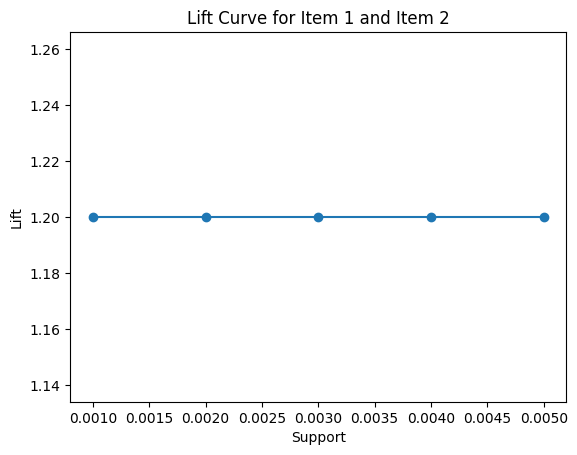

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")

# Load data
data = pd.read_csv('../assets/resources-1.6/groceries.csv')

# Encode the data
data_encoded = data.iloc[:, 1:].applymap(lambda x: 1 if x == True else 0)

# Define the antecedent and consequent
antecedents = {'item_1'}
consequents = {'item_2'}

# Generate frequent itemsets and association rules
support_levels = [0.001, 0.002, 0.003, 0.004, 0.005] # decrease the support levels
lift_values = []
for support in support_levels:
    frequent_itemsets = apriori(data_encoded, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    item1_item2_rules = rules[(rules['antecedents'] == antecedents) & (rules['consequents'] == consequents)]
    if len(item1_item2_rules) > 0:
        lift_values.append(item1_item2_rules['lift'].values[0])

# Plot the lift curve
plt.plot(support_levels, lift_values, marker='o')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Lift Curve for Item 1 and Item 2')
plt.show()

## REFERENCES
1. https://howtolearnmachinelearning.com/articles/the-lift-curve-in-machine-learning/
2. https://en.wikipedia.org/wiki/Lift_%28data_mining%29
3. https://docs.oracle.com/en/middleware/bi/analytics-server/user-oas/evaluate-machine-learning-models-using-lift-and-gain-charts.html
4. https://pubs.rsc.org/en/content/articlelanding/2021/lc/d1lc00225b